<a href="https://colab.research.google.com/github/srividhyayammani/Retail_Sales_Analysis/blob/main/notebooks_03_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving store.csv to store.csv
Saving test.csv.zip to test.csv.zip
Saving train.csv.zip to train.csv.zip


In [ ]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
store = pd.read_csv('store.csv')

print("Train:", train.shape)
print("Test:", test.shape)
print("Store:", store.shape)

display(train.head())

Train: (1017209, 9)
Test: (41088, 8)
Store: (1115, 10)


/tmp/ipython-input-924626318.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
import zipfile
import os

# Create a directory to extract the zip files
os.makedirs('data', exist_ok=True)

# Extract the contents of train.csv.zip
with zipfile.ZipFile('train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Extract the contents of test.csv.zip
with zipfile.ZipFile('test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
df = train.merge(store, on="Store", how="left")
print("Merged shape:", df.shape)
df.head()

Merged shape: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayofWeek"] = df["Date"].dt.dayofweek
df["WeekOfYear"] = df["Date"].dt.isocalendar().week

In [ ]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,DayofWeek,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,4,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,4,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,4,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,4,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,4,31


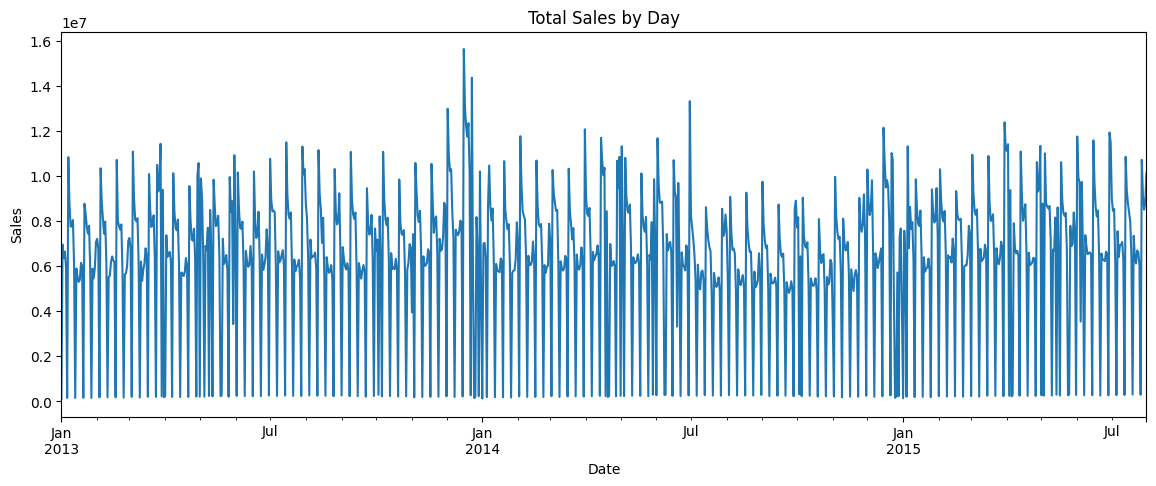

In [ ]:
import matplotlib.pyplot as plt
daily_sales = df.groupby("Date")["Sales"].sum()

plt.figure(figsize=(14,5))
daily_sales.plot()
plt.title("Total Sales by Day")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

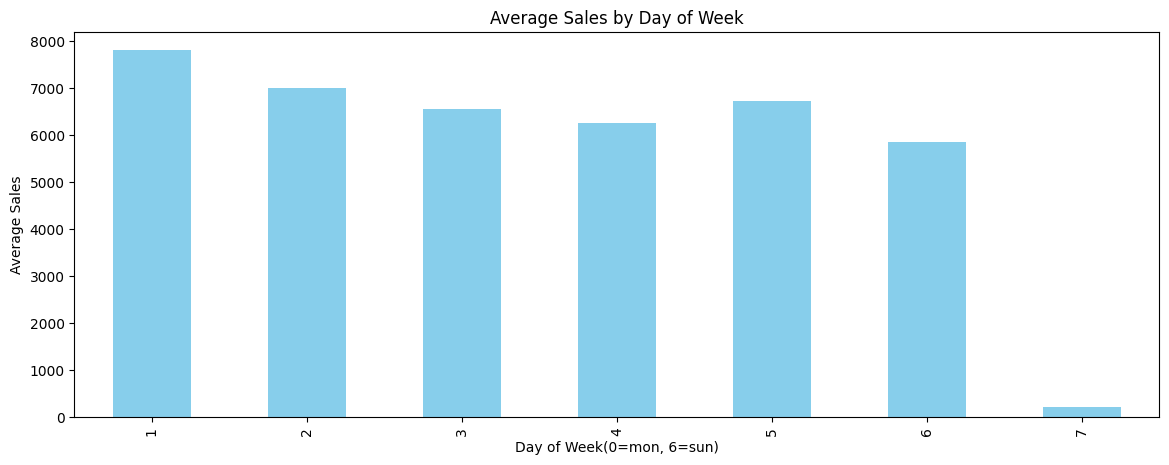

In [ ]:
dow =  df.groupby("DayOfWeek")["Sales"].mean()


plt.figure(figsize=(14,5))
dow.plot(kind="bar",color="skyblue")
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week(0=mon, 6=sun)")
plt.ylabel("Average Sales")
plt.show()

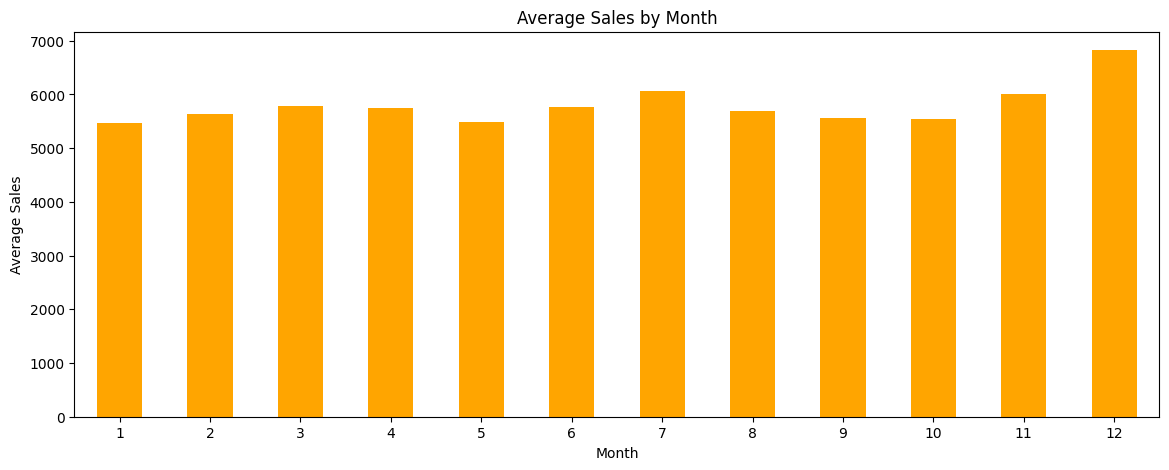

In [ ]:
monthly_sales = df.groupby("Month")["Sales"].mean()

plt.figure(figsize=(14, 5))
monthly_sales.plot(kind="bar", color="orange")
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.show()

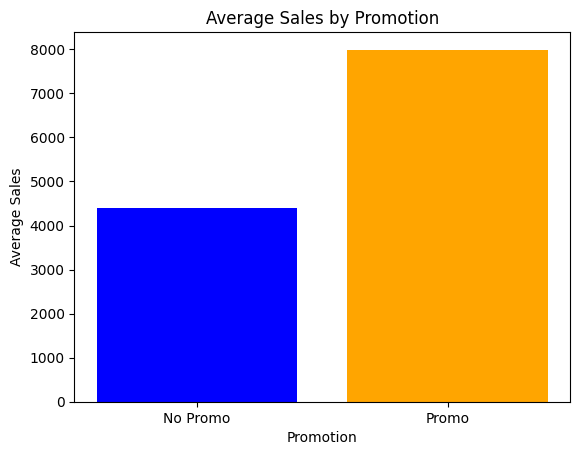

In [ ]:
promo = df.groupby("Promo")["Sales"].mean()

plt.bar(["No Promo", "Promo"], promo, color=["blue", "orange"])
plt.title("Average Sales by Promotion")
plt.xlabel("Promotion")
plt.ylabel("Average Sales")
plt.show()

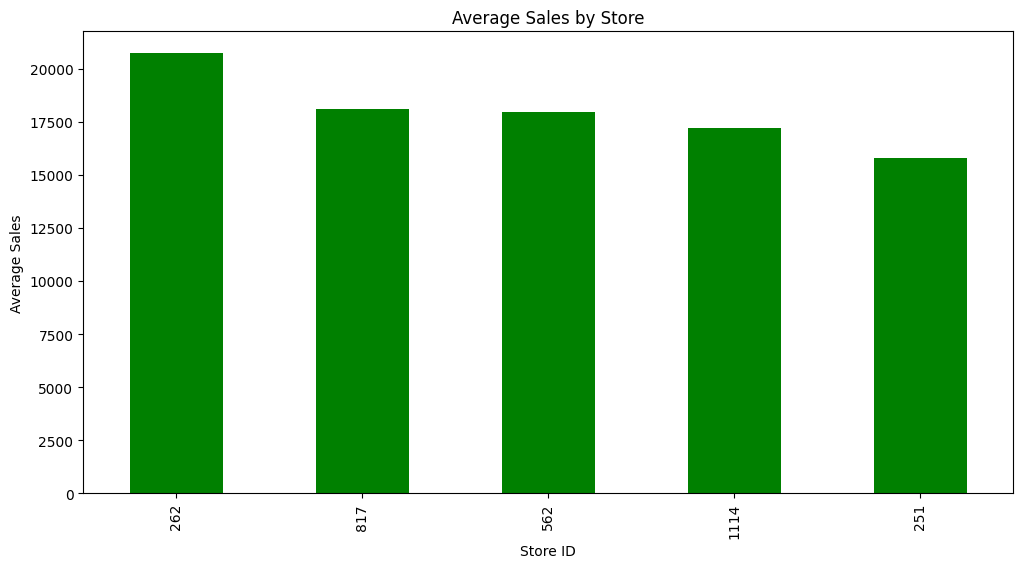

In [ ]:
store_avg = df.groupby("Store")["Sales"].mean().sort_values(ascending=False).head()

plt.figure(figsize=(12, 6))
store_avg.plot(kind="bar", color="green")
plt.title("Average Sales by Store")
plt.xlabel("Store ID")
plt.ylabel("Average Sales")
plt.xticks(rotation=90)
plt.show()

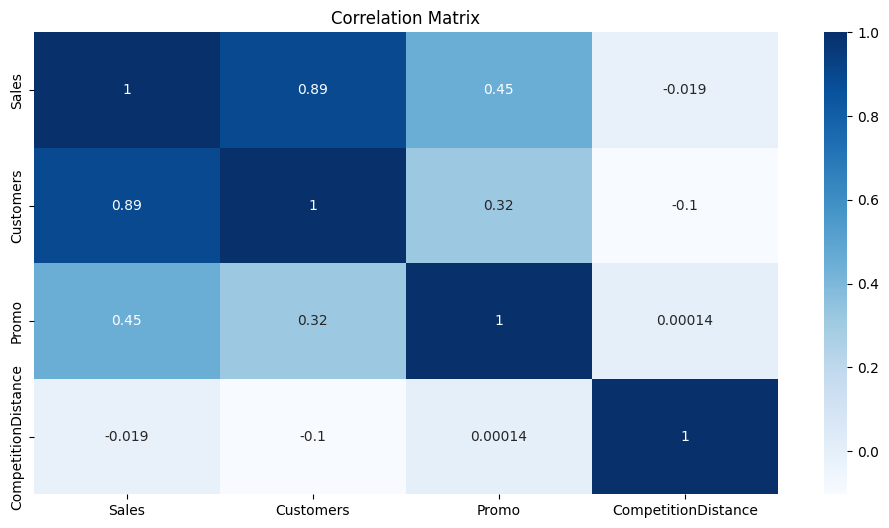

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df[["Sales","Customers","Promo","CompetitionDistance"]].corr(), annot=True, cmap="Blues")

plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Creat_dashboard_csv.py
import pandas as pd
import os
import zipfile # Import zipfile

def main():
    # Ensure data directory exists
    os.makedirs('data', exist_ok=True)

    # Extract the contents of zip files if they exist
    if os.path.exists('train.csv.zip'):
        print("Extracting train.csv.zip...")
        with zipfile.ZipFile('train.csv.zip', 'r') as zip_ref:
            zip_ref.extractall('data')
        print("Extraction complete.")
    else:
        print("train.csv.zip not found. Please upload the file.")

    if os.path.exists('test.csv.zip'):
        print("Extracting test.csv.zip...")
        with zipfile.ZipFile('test.csv.zip', 'r') as zip_ref:
            zip_ref.extractall('data')
        print("Extraction complete.")
    else:
        print("test.csv.zip not found. Please upload the file.")


    # adjust filenames if needed
    train_file = "data/train.csv" # Corrected path
    test_file = "data/test.csv" # Added test file path
    store_file = "store.csv"
    out_file = "Sales_for_dashboard.csv"

    print("Reading files...")
    # Check if files exist before reading
    train = None
    if os.path.exists(train_file):
        train = pd.read_csv(train_file, low_memory=False) # Added low_memory=False to handle dtype warning
        print("train.csv loaded.")
    else:
        print(f"{train_file} not found after extraction attempt.")

    test = None
    if os.path.exists(test_file):
        test = pd.read_csv(test_file) # Read test file
        print("test.csv loaded.")
    else:
         print(f"{test_file} not found after extraction attempt.")

    store = None
    if os.path.exists(store_file):
        store = pd.read_csv(store_file)
        print("store.csv loaded.")
    else:
        print(f"{store_file} not found.")


    print("Merging files...")
    df = None
    if train is not None and store is not None:
        df = train.merge(store, on="Store", how="left")
        print("Dataframes merged.")

        # Add Simple time features
        df["Date"] = pd.to_datetime(df["Date"]) # Convert 'Date' to datetime
        df["DayOfWeek"] = df["Date"].dt.dayofweek # Corrected typo

        df["Year"] = df["Date"].dt.year
        df["Month"] = df["Date"].dt.month
        df["Day"] = df["Date"].dt.day

        # Choose a small set of columns safe for power BI
        dashboard_df =df[["Store", "Date", "Sales", "Customers", "Promo", "DayOfWeek", "Month", "Year",]].copy()
        # Convert Date to ISO string to avoid local issues in other apps
        dashboard_df["Date"] = dashboard_df["Date"].dt.strftime("%Y-%m-%d")

        dashboard_df.to_csv(out_file, index=False)
        print("Saved:", os.path.abspath(out_file))
        print("Rows:", len(dashboard_df))
    else:
        print("Cannot merge dataframes because train.csv or store.csv were not loaded.")


if __name__ == "__main__":
   main()

Extracting train.csv.zip...
Extraction complete.
Extracting test.csv.zip...
Extraction complete.
Reading files...
train.csv loaded.
test.csv loaded.
store.csv loaded.
Merging files...
Dataframes merged.
Saved: /content/Sales_for_dashboard.csv
Rows: 1017209


In [ ]:
from google.colab import files
files.download('Sales_for_dashboard.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving store.csv to store.csv
Saving test.csv.zip to test.csv.zip
Saving train.csv.zip to train.csv.zip
